In [5]:
import pycbc
import os
from matplotlib import pyplot as plt 
from pycbc.inference.io import loadfile 
import numpy as np 
import statistics

In [21]:
!ls

ALL_mass_spin_posteriors_gw190521_IMRPhenomPv2_newrun.hdf
ALL_mass_spin_posteriors_gw190521_IMRPhenomXPHM_newrun.hdf
ALL_mass_spin_posteriors_gw190521_IMRPhenomXPHM_newrun2.hdf
Combine_Posteriors_GW190521.ipynb
GW190521_posteriors_all_IMRPhenomXPHM.png
GW190521_posteriors_all_mass_IMRPHenomPv2_newrun.png
GW190521_posteriors_all_mass_IMRPHenomXPHM_newrun.png
GW190521_posteriors_all_mass_IMRPHenomXPHM_newrun2.png
GW190521_posteriors_all_mass_IMRPhenomPv2.png
GW190521_posteriors_all_mass_IMRPhenomXPHM.png
GW190521_posteriors_all_mass_NRSur7dq4.png
GW190521_posteriors_all_mass_NRSur7dq4_newrun.png
GW190521_srcmasses_combined_posteriors.png
inference_redshift_gw190521_IMRPhenomPv2.hdf
inference_redshift_gw190521_IMRPhenomXPHM.hdf
inference_redshift_gw190521_NRSur7dq4.hdf
well0.html


In [7]:
nrsur = loadfile('ALL_mass_spin_posteriors_gw190521_IMRPhenomPv2_newrun.hdf', 'r') 
xphm = loadfile('ALL_mass_spin_posteriors_gw190521_IMRPhenomXPHM_newrun.hdf', 'r') 
pv2 = loadfile('ALL_mass_spin_posteriors_gw190521_IMRPhenomXPHM_newrun2.hdf', 'r')

In [8]:
xphm_samples = nrsur.read_samples(nrsur['samples'].keys(), temps=0) 
nrsur_samples = xphm.read_samples(xphm['samples'].keys(), temps=0)  
pv2_samples = pv2.read_samples(pv2['samples'].keys(),temps=0) 

In [9]:
len(pv2_samples) == len(xphm_samples) == len(nrsur_samples)

False

In [10]:
mass1_xphm = xphm_samples['srcmass1']
mass2_xphm = xphm_samples['srcmass2']

mass1_nrsur = nrsur_samples['srcmass1']
mass2_nrsur = nrsur_samples['srcmass2'] 

mass1_pv2 = pv2_samples['srcmass1'] 
mass2_pv2 = pv2_samples['srcmass2'] 

mass1 = np.append(mass1_xphm,mass1_nrsur) 
mass1 = np.append(mass1,mass1_pv2) 

mass2 = np.append(mass2_xphm,mass2_nrsur) 
mass2 = np.append(mass2,mass2_pv2)

In [11]:
len(mass1) 
%matplotlib inline

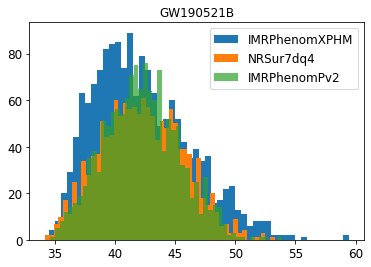

In [23]:
#plt.hist(mass1,bins = 50, label = 'Combined')  + 
plt.hist(mass1_xphm,bins = 50,label = 'IMRPhenomXPHM') + plt.hist(mass1_nrsur,bins = 50,label = 'NRSur7dq4') + plt.hist(mass1_pv2,bins = 50,label = 'IMRPhenomPv2',alpha = 0.7) 
plt.title('GW190521B')
plt.legend()
plt.show()

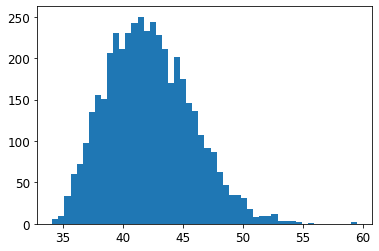

In [13]:
plt.hist(mass1,bins = 50) 
plt.show()

In [14]:
print(np.percentile(mass1,5))
print(np.median(mass1)) 
print(np.percentile(mass1,95))

36.87577610095803
42.004692821326955
48.28636706754615


In [15]:
print(np.percentile(mass1_xphm,5))
print(np.median(mass1_xphm)) 
print(np.percentile(mass1_xphm,95))

36.76537577663427
41.65225493540861
49.667026100195386


In [16]:
print(np.percentile(mass1_nrsur,5))
print(np.median(mass1_nrsur)) 
print(np.percentile(mass1_nrsur,95))

36.80160353657909
42.16127049178971
47.90787877144781


In [17]:
print(np.percentile(mass1_pv2,5))
print(np.median(mass1_pv2)) 
print(np.percentile(mass1_pv2,95))

37.23272081374899
42.11217899044235
47.609084727219695


In [18]:
lik_xphm = xphm_samples['loglikelihood']
lik_nrsur = nrsur_samples['loglikelihood'] 
lik_pv2 = pv2_samples['loglikelihood']
lik = np.append(lik_xphm,lik_nrsur) 
lik = np.append(lik,lik_pv2)

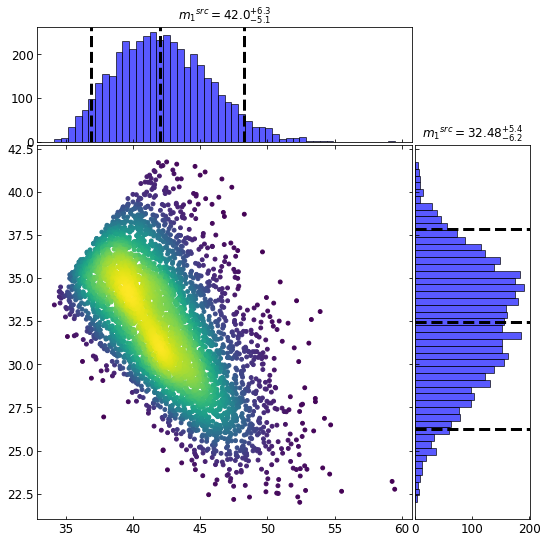

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot: 
from scipy.stats import gaussian_kde

xy = np.vstack([mass1,mass2])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
mass1, mass2, z = mass1[idx], mass2[idx], z[idx]



ax_scatter.scatter(mass1, mass2,c = z,s=15)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([mass1, mass2]).max() / binwidth) * binwidth
# ax_scatter.set_xlim((0, lim))
# ax_scatter.set_ylim((0, lim))

bins = np.arange(0, lim + binwidth, binwidth)
ax_histx.hist(mass1, bins=50, color='b', edgecolor='k', alpha=0.65)
ax_histy.hist(mass2, bins=50, color='b', edgecolor='k', alpha=0.65,orientation = 'horizontal')

ax_histx.axvline(statistics.median(mass1), color='k', linestyle='dashed', linewidth=3)
ax_histx.axvline(np.percentile(mass1,5), color='k', linestyle='dashed', linewidth=3)
ax_histx.axvline(np.percentile(mass1,95), color='k', linestyle='dashed', linewidth=3)

ax_histy.axhline(y = statistics.median(mass2), color='k', linestyle='dashed', linewidth=3)
ax_histy.axhline(np.percentile(mass2,5), color='k', linestyle='dashed', linewidth=3)
ax_histy.axhline(np.percentile(mass2,95), color='k', linestyle='dashed', linewidth=3)

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim()) 

mass1_med = str(round(statistics.median(mass1),2)) 
mass2_med = str(round(statistics.median(mass2),2))

lower_mass1 = str(round(statistics.median(mass1) - np.percentile(mass1,5),1))
lower_mass2 = str(round(statistics.median(mass2) - np.percentile(mass2,5),1))

upper_mass1 = str(round(-(statistics.median(mass1) - np.percentile(mass1,95)),1))
upper_mass2 = str(round(-(statistics.median(mass2) - np.percentile(mass2,95)),1))

ax_histx.set_title('${m_1}^{src} = {' + mass1_med + '^{+' + upper_mass1 + '}_{-' + lower_mass1 + '}}}$')  
ax_histy.set_title('${m_1}^{src} = {' + mass2_med + '^{+' + upper_mass2 + '}_{-' + lower_mass2 + '}}}$')
plt.savefig('GW190521_srcmasses_combined_posteriors.png')
plt.show()

Parameter	90% Credible Interval	Maximum Posterior	Maximum Likelihood
$a_{2}$	$0.40^{+0.45}_{-0.34}$	$0.40$	$0.04$
$\theta_2^\mathrm{azimuthal}$	$3.5^{+2.4}_{-2.8}$	$5$	$5$
$\theta_2^\mathrm{polar}$	$1.50^{+1.12}_{-0.88}$	$1.66$	$1.25$
$\iota$	$0.50^{+2.47}_{-0.38}$	$0.51$	$2.95$
$\Delta t_c~(\rm{s})$	$-0.0231^{+0.0065}_{-0.0016}$	$-0.0198$	$-0.0243$
$\psi$	$2.5^{+3.4}_{-2.1}$	$1.7$	$3.6$
$\delta$	$-0.62^{+0.54}_{-0.39}$	$-0.31$	$-0.90$
$d_L$ (Mpc)	$570^{+160}_{-170}$	$500$	$690$
$V_C~(\rm{Mpc}^3)$	$3.1^{+5.2}_{-2.9}\times 10^{9}$	$8.8\times 10^{9}$	$1.2\times 10^{9}$
$\theta_1^\mathrm{polar}$	$1.40^{+0.95}_{-0.84}$	$1.72$	$1.58$
$m_1^{\rm{src}}~(\mathrm{M}_\odot)$	$33.4^{+6.1}_{-3.9}$	$30.6$	$33.8$
$\alpha$	$2.678^{+0.051}_{-0.155}$	$2.678$	$2.667$
$\theta_1^\mathrm{azimuthal}$	$3.7^{+2.3}_{-2.5}$	$5.9$	$2.8$
$a_{1}$	$0.44^{+0.37}_{-0.39}$	$0.71$	$0.52$
$\phi_c$	$2.5^{+2.8}_{-2.1}$	$1.2$	$1.8$
$m_2^{\rm{src}}~(\mathrm{M}_\odot)$	$28^{+4.3}_{-5.2}$	$22.7$	$29.2$
